# Roulette Simulation and Profit Analysis

In [16]:
import random

def Roulet_game(N):
    SN = 0
    for i in range(N):
        R = random.randint(0, 38)
        if R <= 18:
            SN += 1
        else:
            SN -= 1
    return SN

result = Roulet_game(10)
print(result)


-6


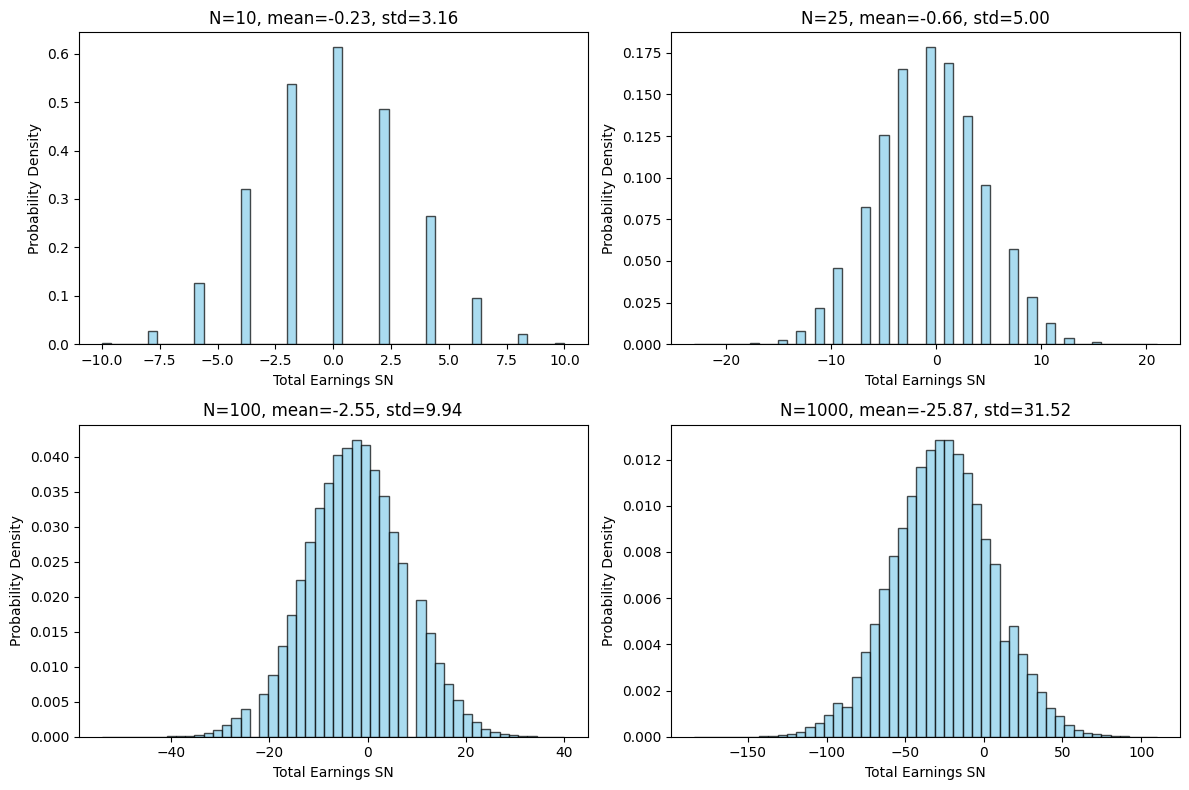

In [17]:
import numpy as np
import matplotlib.pyplot as plt

Ns = [10, 25, 100, 1000]
num_simulations = 100_000

plt.figure(figsize=(12, 8))

for i, N in enumerate(Ns, 1):
    results = [Roulet_game(N) for _ in range(num_simulations)]
    mean_SN = np.mean(results)
    std_SN = np.std(results)

    plt.subplot(2, 2, i)
    plt.hist(results, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'N={N}, mean={mean_SN:.2f}, std={std_SN:.2f}')
    plt.xlabel('Total Earnings SN')
    plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

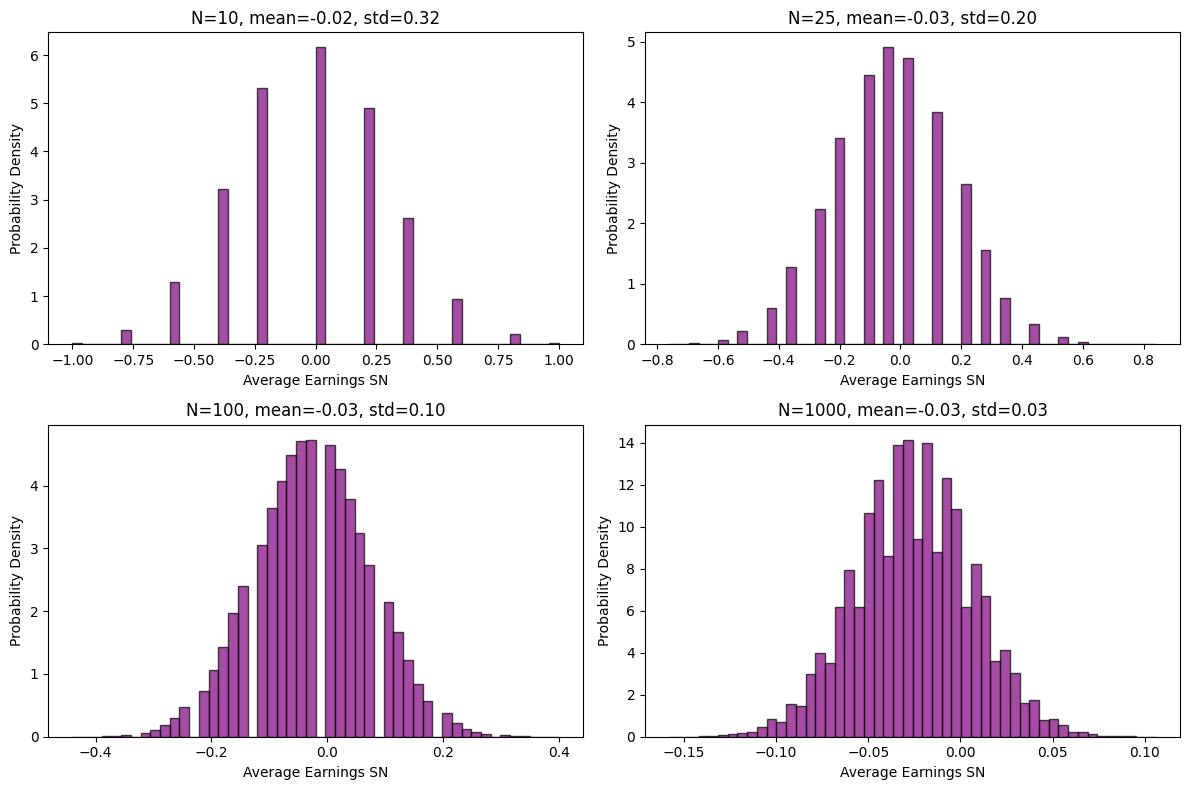

In [20]:
plt.figure(figsize=(12, 8))

for i, N in enumerate(Ns, 1):
    results = [((Roulet_game(N))/N) for _ in range(num_simulations)]
    mean_SN = np.mean(results)
    std_SN = np.std(results)

    plt.subplot(2, 2, i)
    plt.hist(results, bins=50, density=True, alpha=0.7, color='purple', edgecolor='black')
    plt.title(f'N={N}, mean={mean_SN:.2f}, std={std_SN:.2f}')
    plt.xlabel('Average Earnings SN')
    plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

## approximate the probability that the casino loses

In [30]:
import random
import numpy as np

def Cosino_lose(N):
    count = 0
    for i in range(N):
        R = random.randint(0, 38)
        if R <= 18:
            count += 1

    return count/N

for i in range(100000):
  result = [Cosino_lose(25)]

mean_result = np.mean(result)
print(f"the probability of casino loss by Monte Carlo: {mean_result}")


the probability of casino loss by Monte Carlo: 0.44


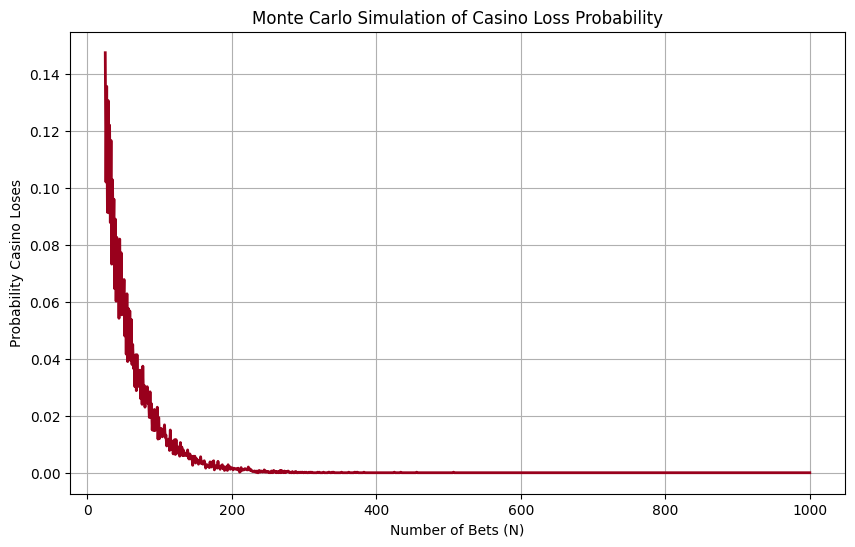

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# probability that casino loses in a single bet (example: 0.4)
p_loss = 0.3963

N_values = range(25, 1001)
num_simulations = 5000

loss_probabilities = []

for N in N_values:
    losses = np.random.binomial(N, p_loss, size=num_simulations)

    casino_loses = (losses > (N / 2)).mean() # TIP! [True, False, True, True] → mean = 0.75 -> probability


    loss_probabilities.append(casino_loses)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.plot(N_values, loss_probabilities  , color="#99001C", linewidth=2)
plt.xlabel("Number of Bets (N)")
plt.ylabel("Probability Casino Loses")
plt.title("Monte Carlo Simulation of Casino Loss Probability")
plt.grid(True)
plt.show()
